In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [5]:
def creat_data(m):
    
    N = 50
    x = torch.randn(N , 1)
    y = m*x + torch.randn(N,1)/2

    plt.plot(x,y,'s')
    plt.show()
    
    return x , y 
    
def buildAndtrainTheModel(x , y):

    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    
    learningRate = .05
    
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)
    
    numepoche = 500
    losses = torch.zeros(numepoche)
    
    for epochei in range(numepoche):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat , y)
        losses[epochei] = loss

        # back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # end training loop
        
    predictions = ANNreg(x)
    testloss = (predictions-y).pow(2).mean()

    plt.plot(losses.detach(), 'o', markerfacecolor='w' , linewidth=.1)
    plt.plot(numepoche , testloss.detach(), 'ro')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('final loss = %g' %testloss.item())
    plt.show()

    plt.plot(x,y,'bo', label = 'Real data')
    plt.plot(x,  predictions.detach() , 'rs', label= 'Predictions')
    plt.title(f'prediction-data r={np.corrcoef(y.T , predictions.detach().T)[0,1]:.2f}')
    plt.legend()
    plt.show()

    return predictions , losses

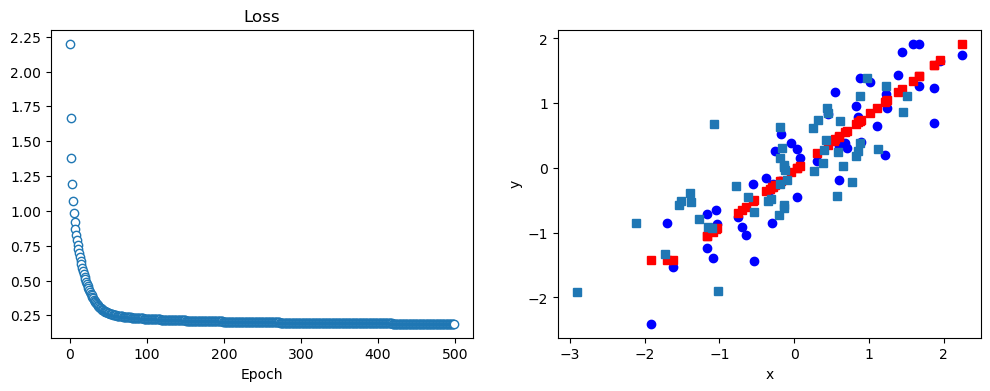

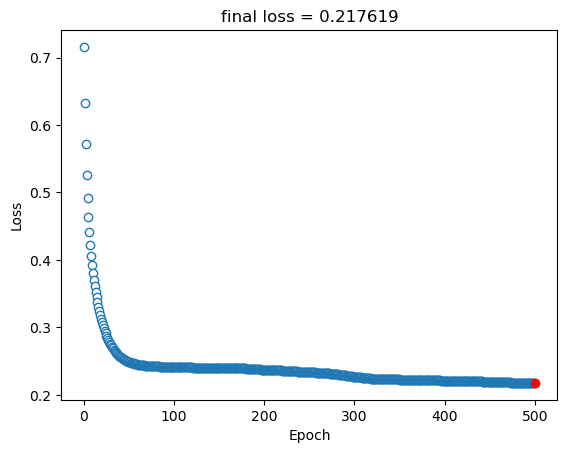

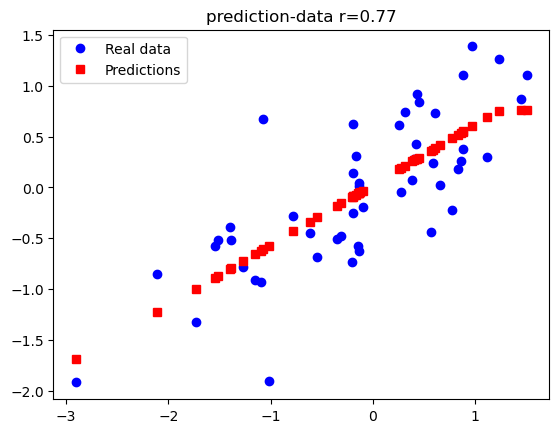

<function matplotlib.pyplot.show(close=None, block=None)>

In [8]:
# ceate a dataset
x , y = creat_data(.8)

# run the model
yHat , losses = buildAndtrainTheModel(x,y)

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(), 'o' , markerfacecolor='w' , linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x , y , 'bo' , label = 'Real data')
ax[1].plot(x , yHat.detach() , 'rs' , label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction_data corrr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()
plt.show

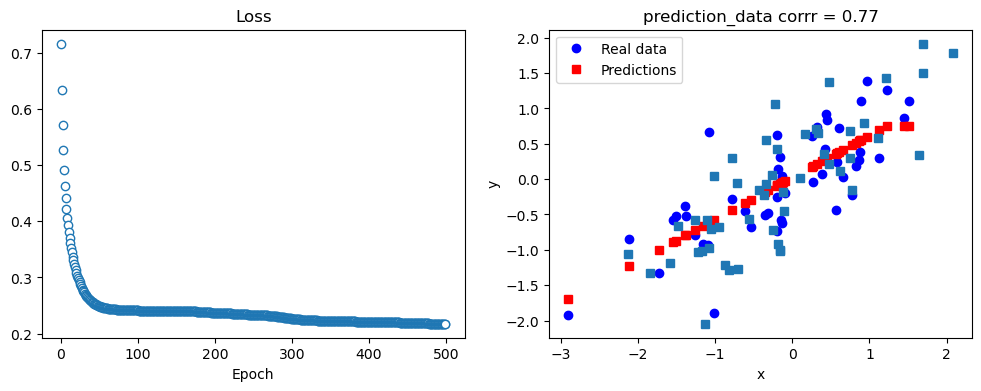

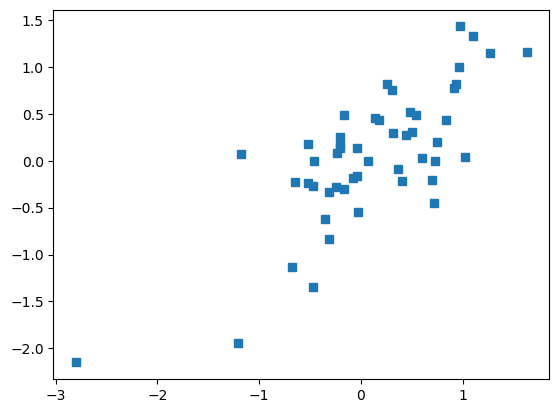

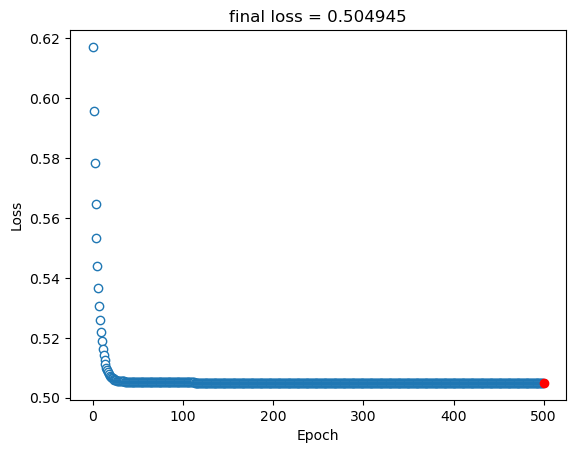

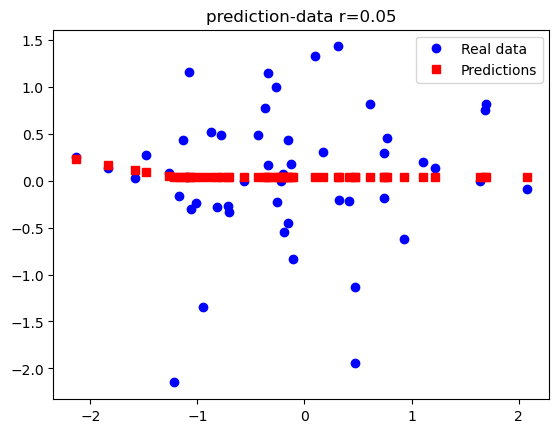

(tensor([[0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.2322],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0526],
         [0.0973],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.1195],
         [0.0444],
         [0.0444],
         [0.1713],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444],
         [0.0444]], grad_fn=<AddmmBackward0>),
 tensor([0.6171, 0.595

In [10]:
x = creat_data(.8)[0]
y = creat_data(.8)[1]

buildAndtrainTheModel(x,y)